In [147]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

In [148]:
X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])

In [149]:
X

array([[ 1,  2],
       [ 2,  2],
       [ 2,  3],
       [ 8,  7],
       [ 8,  8],
       [25, 80]])

In [150]:
print(X[:,0],X[:,1])

[ 1  2  2  8  8 25] [ 2  2  3  7  8 80]


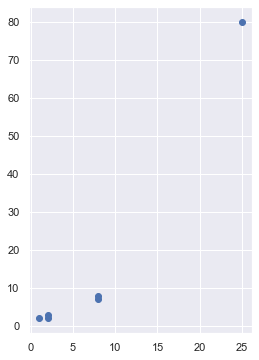

In [151]:
plt.figure(figsize=(4,6))
plt.scatter(X[:,0],X[:,1])

In [152]:
clustering = DBSCAN(eps=2,min_samples=2,metric='euclidean').fit(X)

In [153]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

In [154]:
len(set(clustering.labels_))

3

In [155]:
clustering = DBSCAN(eps=2,min_samples=3,metric='euclidean').fit(X)

In [156]:
clustering.labels_

array([ 0,  0,  0, -1, -1, -1], dtype=int64)

In [157]:
from sklearn.cluster import KMeans

In [158]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(X)

In [159]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1])

In [160]:
kmeans.cluster_centers_

array([[ 4.2,  4.4],
       [25. , 80. ]])

In [161]:
Y=kmeans.cluster_centers_

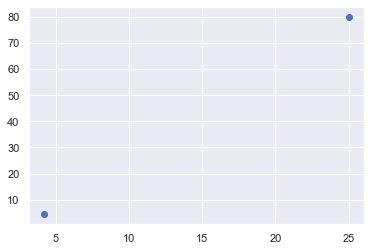

In [162]:
plt.scatter(Y[:,0],Y[:,1])

In [163]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

In [164]:
X,y = make_blobs(n_samples=200,centers=4,cluster_std=0.60,random_state=0)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

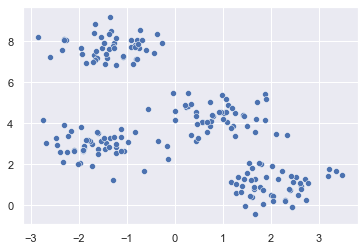

In [165]:
sns.scatterplot(X[:,0],X[:,1])

In [166]:
samples=[[0,0,1],[2,4,5],[7,8,8] ]
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

NearestNeighbors(n_neighbors=1)

In [167]:
print(neigh.kneighbors([[1,1,1]]))

(array([[1.41421356]]), array([[0]], dtype=int64))


In [168]:
print(neigh.kneighbors([[5,6,7]]))

(array([[3.]]), array([[2]], dtype=int64))


In [169]:
print(neigh.kneighbors([[2,3,3]]))

(array([[2.23606798]]), array([[1]], dtype=int64))


In [170]:
neigh_X = NearestNeighbors(n_neighbors=2)
neigh_model = neigh_X.fit(X)
distances,indices = neigh_model.kneighbors(X)

In [171]:
distances = np.sort(distances,axis=0)


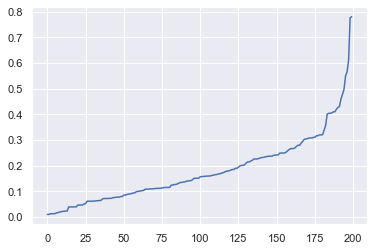

In [172]:
plt.plot(distances[:,1])

In [173]:
cluster_dbscan = DBSCAN(eps=0.5,min_samples=5)
cluster_dbscan.fit(X)

DBSCAN()

In [174]:
clusters=cluster_dbscan.labels_

In [175]:
len(set(clusters))

5

In [176]:
from sklearn.metrics import silhouette_score

In [177]:
silhouette_score(X,clusters)

0.5506633757011048